In [1]:
# Import required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

## 1. Load the datasets

For the project, we provide a training set with 50000 images in the directory `../data/images/` with:
- noisy labels for all images provided in `../data/noisy_label.csv`;
- clean labels for the first 10000 images provided in `../data/clean_labels.csv`. 

In [2]:
# [DO NOT MODIFY THIS CELL]

# load the images
n_img = 50000
n_noisy = 40000
n_clean_noisy = n_img - n_noisy
imgs = np.empty((n_img,32,32,3))
for i in range(n_img):
    img_fn = f'../data/images/{i+1:05d}.png'
    imgs[i,:,:,:]=cv2.cvtColor(cv2.imread(img_fn),cv2.COLOR_BGR2RGB)


In [3]:
print(imgs.shape)

(50000, 32, 32, 3)


In [4]:
# load the labels
clean_labels = np.genfromtxt('../data/clean_labels.csv', delimiter=',', dtype="int8")
noisy_labels = np.genfromtxt('../data/noisy_labels.csv', delimiter=',', dtype="int8", skip_header=10000)
# Reading the remaining 40000 labels, excluding the first 10000 labels
print(noisy_labels[:3])

[1 7 3]


In [5]:
clean_imgs = imgs[:10000,:,:,:]
noisy_imgs = imgs[10000:,:,:,:]

print(clean_imgs.shape, noisy_imgs.shape)

(10000, 32, 32, 3) (40000, 32, 32, 3)


For illustration, we present a small subset (of size 8) of the images with their clean and noisy labels in `clean_noisy_trainset`. You are encouraged to explore more characteristics of the label noises on the whole dataset. 

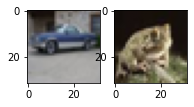

In [6]:
# [DO NOT MODIFY THIS CELL]

fig = plt.figure()

ax1 = fig.add_subplot(2,4,1)
ax1.imshow(noisy_imgs[0]/255)
ax2 = fig.add_subplot(2,4,2)
ax2.imshow(noisy_imgs[1]/255)
# ax3 = fig.add_subplot(2,4,3)
# ax3.imshow(imgs[2]/255)
# ax4 = fig.add_subplot(2,4,4)
# ax4.imshow(imgs[3]/255)
# ax1 = fig.add_subplot(2,4,5)
# ax1.imshow(imgs[4]/255)
# ax2 = fig.add_subplot(2,4,6)
# ax2.imshow(imgs[5]/255)
# ax3 = fig.add_subplot(2,4,7)
# ax3.imshow(imgs[6]/255)
# ax4 = fig.add_subplot(2,4,8)
# ax4.imshow(imgs[7]/255)

# # The class-label correspondence
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# # print clean labels
# print('Clean labels:')
# print(' '.join('%5s' % classes[clean_labels[j]] for j in range(8)))
# # print noisy labels
# print('Noisy labels:')
# print(' '.join('%5s' % classes[noisy_labels[j]] for j in range(8)))


## 2. The predictive model - Exploring different models to choose the one with the best test accuracy.

In [7]:
# RGB histogram dataset construction - train data
no_bins_train = 6
bins_train = np.linspace(0, 255, no_bins_train) # the range of the rgb histogram
img_feature_train = np.empty((noisy_imgs.shape[0], 3*(len(bins_train)-1)))
i = 0

for i in range(noisy_imgs.shape[0]):
    
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1_tr = np.histogram(noisy_imgs[i][:,:,0],bins=bins_train)[0] 
    feature2_tr = np.histogram(noisy_imgs[i][:,:,1],bins=bins_train)[0]
    feature3_tr = np.histogram(noisy_imgs[i][:,:,2],bins=bins_train)[0]
    
    # Concatenate three features
    img_feature_train[i,] = np.concatenate((feature1_tr, feature2_tr, feature3_tr), axis=None)
    i += 1
    

# RGB histogram dataset construction - test data
no_bins_test = 6
bins_test = np.linspace(0, 255, no_bins_test) # the range of the rgb histogram
img_feature_test = np.empty((clean_imgs.shape[0], 3*(len(bins_test)-1)))
i = 0

for i in range(clean_imgs.shape[0]):
    
    # Use the numbers of pixels in each bin for all three channels as the features
    feature1_ts = np.histogram(clean_imgs[i][:,:,0],bins=bins_test)[0] 
    feature2_ts = np.histogram(clean_imgs[i][:,:,1],bins=bins_test)[0]
    feature3_ts = np.histogram(clean_imgs[i][:,:,2],bins=bins_test)[0]
    
    # Concatenate three features
    img_feature_test[i,] = np.concatenate((feature1_ts, feature2_ts, feature3_ts), axis=None)
    i += 1

### Implementing a Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
# Train
dt_model = DecisionTreeClassifier(random_state=0).fit(img_feature_train, noisy_labels)

# Predict
pred_dt_test= dt_model.predict(img_feature_test)

# Evaluate
print(classification_report(pred_dt_test, clean_labels)) # accuracy = 0.14

              precision    recall  f1-score   support

           0       0.17      0.17      0.17       992
           1       0.12      0.12      0.12       999
           2       0.15      0.15      0.15      1015
           3       0.10      0.11      0.11       936
           4       0.15      0.14      0.14      1062
           5       0.13      0.12      0.12      1039
           6       0.13      0.13      0.13      1019
           7       0.15      0.15      0.15       971
           8       0.15      0.16      0.15       966
           9       0.15      0.15      0.15      1001

    accuracy                           0.14     10000
   macro avg       0.14      0.14      0.14     10000
weighted avg       0.14      0.14      0.14     10000



### Implementing a Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
# Train
rf_model = RandomForestClassifier(random_state=0).fit(img_feature_train, noisy_labels)

# Predict
pred_rf_test= rf_model.predict(img_feature_test)

# Evaluate
print(classification_report(pred_rf_test, clean_labels)) # accuracy = 0.26

              precision    recall  f1-score   support

           0       0.35      0.34      0.35      1015
           1       0.32      0.26      0.29      1188
           2       0.19      0.22      0.20       908
           3       0.14      0.16      0.15       924
           4       0.26      0.23      0.25      1142
           5       0.19      0.19      0.19       957
           6       0.30      0.29      0.29      1059
           7       0.22      0.25      0.23       891
           8       0.29      0.32      0.30       935
           9       0.29      0.29      0.29       981

    accuracy                           0.26     10000
   macro avg       0.26      0.25      0.25     10000
weighted avg       0.26      0.26      0.26     10000



### Implementing a KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Train
knn_model = KNeighborsClassifier(n_neighbors = 20).fit(img_feature_train, noisy_labels)

# Predict
pred_knn_test= knn_model.predict(img_feature_test)

# Evaluate
print(classification_report(pred_knn_test, clean_labels)) # accuracy = 0.21

              precision    recall  f1-score   support

           0       0.34      0.27      0.30      1237
           1       0.31      0.20      0.24      1546
           2       0.21      0.19      0.20      1101
           3       0.15      0.15      0.15      1030
           4       0.20      0.20      0.20       967
           5       0.15      0.15      0.15       900
           6       0.23      0.25      0.24       946
           7       0.15      0.22      0.18       706
           8       0.21      0.27      0.24       784
           9       0.19      0.24      0.21       783

    accuracy                           0.21     10000
   macro avg       0.21      0.21      0.21     10000
weighted avg       0.22      0.21      0.22     10000



/Users/wendyzhu/opt/anaconda3/envs/firstEnv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Implementing a Naive Bayes classifier

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
# Train
nb_model = GaussianNB().fit(img_feature_train, noisy_labels)

# Predict
pred_nb_test= nb_model.predict(img_feature_test)

# Evaluate
print(classification_report(pred_nb_test, clean_labels)) # accuracy = 0.25

              precision    recall  f1-score   support

           0       0.50      0.31      0.38      1593
           1       0.30      0.22      0.25      1313
           2       0.13      0.28      0.17       457
           3       0.03      0.17      0.05       164
           4       0.44      0.21      0.28      2109
           5       0.03      0.23      0.05       126
           6       0.28      0.27      0.28      1097
           7       0.03      0.34      0.06        98
           8       0.18      0.28      0.22       650
           9       0.55      0.23      0.32      2393

    accuracy                           0.25     10000
   macro avg       0.25      0.25      0.21     10000
weighted avg       0.39      0.25      0.29     10000

